In [1]:
import tensorflow.keras as keras
import tensorflow as tf

print(tf.__version__)

2.8.0


**Prep Data**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

**Look at data**

In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**Visualize a sample of the dataset**

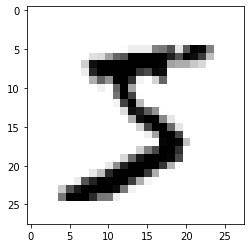

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

**Value of a piece of data on the same index**

In [5]:
print(y_train[0])

5


**Normalize Data**

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

**New look at data**

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

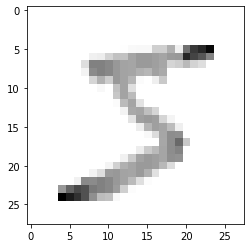

In [7]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

### Build Model

In [8]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track


2022-03-06 18:28:01.826983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-06 18:28:01.831303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-06 18:28:01.831767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-06 18:28:01.832821: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Train Model

In [9]:
model.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2611 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1058 - accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0712 - accuracy: 0.9774


### Evaluate Model

In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy


313/313 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9711
0.09050118178129196
0.9710999727249146


### Export Model to File

In [11]:
model.save('epic_num_reader.model')

2022-03-06 18:28:11.019282: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: epic_num_reader.model/assets


### Load Model From File

In [12]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
# use model to make predictions
predictions = new_model.predict(x_test)
print(predictions)

[[1.02908629e-07 1.34203319e-07 1.31423585e-05 ... 9.99978781e-01
  4.57572554e-07 2.96388578e-07]
 [9.73038112e-08 2.27416982e-04 9.99763548e-01 ... 2.15977195e-07
  1.15893030e-07 2.95038771e-10]
 [2.90811477e-06 9.98341322e-01 4.82957403e-05 ... 1.22422318e-03
  1.78044691e-04 6.25130679e-06]
 ...
 [8.80695872e-09 1.48299398e-06 7.41462657e-07 ... 1.58687428e-04
  1.88533268e-05 1.34635123e-03]
 [5.01096883e-06 6.70176087e-06 5.42697933e-07 ... 7.17374107e-08
  1.30483415e-04 5.56753328e-08]
 [2.35556534e-08 8.41612960e-11 1.77941306e-09 ... 7.25096727e-14
  4.67275685e-09 5.13713161e-09]]


In [13]:
# convert predictions from probability distributions into actual numbers
import numpy as np
print(np.argmax(predictions[0]))

7


### Look at Input

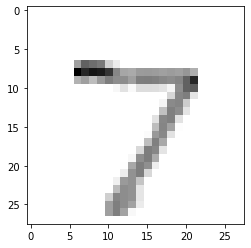

In [14]:
# visualize the image of which prediction was based on 
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()